<a href="https://colab.research.google.com/github/anand-bits/Pubg_Game-Prediction-/blob/main/Pubg_Game_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
from IPython.display import HTML


image_url = "https://media.giphy.com/media/CPKPjSlBhiqbhOZoOR/giphy.gif"


html_code = f'''
<div style="display: flex; justify-content: center;">
    <img src="{image_url}" style="width: 50%; margin-top: 10px;">
</div>
'''
display(HTML(html_code))


# Table of content 
# 1.[Importing The Libraries](#import)
# 2.[Reading the data](#read)

# **Importing The Libraries**

In [102]:
!pip install catboost



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
from ast import increment_lineno
import catboost as cb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# **Reading the data**

In [104]:
data=pd.read_csv("/content/train_V2.csv")
data.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.0,0.0,0.000,0.0,0.0,0.0,60.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.0,91.470,0.0,0.0,0.0,57.0,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1.0,0.0,68.000,0.0,0.0,0.0,47.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.0,32.900,0.0,0.0,0.0,75.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.0,100.000,0.0,0.0,0.0,45.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0.0,0.0,100.000,1.0,1.0,0.0,44.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,34.70,1.0,0.0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0.0,0.0,0.000,0.0,0.0,0.0,96.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,13.50,1.0,1497.0,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0.0,0.0,8.538,0.0,0.0,0.0,48.0,...,0.0,2004.0000,0.0,0.00,0.0,0.0,1089.00,6.0,1500.0,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0.0,0.0,51.600,0.0,0.0,0.0,64.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,799.90,4.0,0.0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0.0,0.0,37.270,0.0,0.0,0.0,74.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,65.67,1.0,0.0,0.2143


In [105]:
data.shape

(1979559, 29)

In [106]:
test=pd.read_csv("/content/test_V2.csv")
test.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0.0,0.0,51.46,0.0,0.0,0.0,73.0,...,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,588.0,1.0,0.0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0.0,4.0,179.10,0.0,0.0,2.0,11.0,...,1503.0,2.0,4669.0,0.0,0.0,0.0,0.0,2017.0,6.0,0.0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1.0,0.0,23.40,0.0,0.0,4.0,49.0,...,1565.0,0.0,0.0,0.0,0.0,0.0,0.0,787.8,4.0,0.0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0.0,0.0,65.52,0.0,0.0,0.0,54.0,...,1465.0,0.0,0.0,0.0,0.0,0.0,0.0,1812.0,3.0,0.0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0.0,4.0,330.20,1.0,2.0,1.0,7.0,...,1480.0,1.0,0.0,0.0,0.0,0.0,0.0,2963.0,4.0,0.0
5,3e2539b5d78183,029b5a79e08cd6,10186f5c852f62,0.0,0.0,0.00,0.0,0.0,0.0,89.0,...,1490.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,d812d2f1d88a02,6285bb4eec83e4,f185809740a1a7,0.0,3.0,470.70,3.0,2.0,17.0,3.0,...,1538.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,4.0,0.0
7,a8a377e4d43bf8,61ec2e7730a3b8,d31adc82a4930e,0.0,0.0,68.61,0.0,0.0,0.0,73.0,...,1487.0,0.0,0.0,0.0,0.0,0.0,0.0,1217.0,5.0,0.0
8,f18301e30d47d3,e7d609e08f09b6,bcde504ef16743,0.0,0.0,0.00,0.0,0.0,0.0,56.0,...,1640.0,0.0,2355.0,0.0,0.0,0.0,0.0,1390.0,7.0,0.0
9,ec7b965ef978b3,c4c19ef6d6c6d9,6dc5b34c92d5ff,0.0,0.0,67.32,0.0,0.0,0.0,54.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1634.0,5.0,1495.0


In [107]:
test.shape

(734834, 28)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979559 entries, 0 to 1979558
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          float64
 4   boosts           float64
 5   damageDealt      float64
 6   DBNOs            float64
 7   headshotKills    float64
 8   heals            float64
 9   killPlace        float64
 10  killPoints       float64
 11  kills            float64
 12  killStreaks      float64
 13  longestKill      float64
 14  matchDuration    float64
 15  matchType        object 
 16  maxPlace         float64
 17  numGroups        float64
 18  rankPoints       float64
 19  revives          float64
 20  rideDistance     float64
 21  roadKills        float64
 22  swimDistance     float64
 23  teamKills        float64
 24  vehicleDestroys  float64
 25  walkDistance     float64
 26  weaponsAcquired  float64
 27  winPoints   

In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734834 entries, 0 to 734833
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               734834 non-null  object 
 1   groupId          734834 non-null  object 
 2   matchId          734833 non-null  object 
 3   assists          734833 non-null  float64
 4   boosts           734833 non-null  float64
 5   damageDealt      734833 non-null  float64
 6   DBNOs            734833 non-null  float64
 7   headshotKills    734833 non-null  float64
 8   heals            734833 non-null  float64
 9   killPlace        734833 non-null  float64
 10  killPoints       734833 non-null  float64
 11  kills            734833 non-null  float64
 12  killStreaks      734833 non-null  float64
 13  longestKill      734833 non-null  float64
 14  matchDuration    734833 non-null  float64
 15  matchType        734833 non-null  object 
 16  maxPlace         734833 non-null  floa

# **Analysing The data**

In [110]:
#kills Without Moving this means may be done cheating
data['totaldistance']=data['rideDistance']+data['swimDistance']+data['walkDistance']
data['killswithoutmoving']=((data['kills']>0) & (data['totaldistance']==0))

In [111]:
data[data['killswithoutmoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totaldistance,killswithoutmoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0.0,0.0,593.0,0.0,0.0,3.0,18.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.8571,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2.0,0.0,346.6,0.0,0.0,6.0,33.0,...,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.6000,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2.0,0.0,1750.0,0.0,4.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.8947,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0.0,0.0,157.8,0.0,0.0,0.0,69.0,...,0.0,0.0,0.0,0.0,0.0,7.0,1500.0,0.0000,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0.0,0.0,100.0,0.0,1.0,0.0,37.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.3000,0.0,True


In [112]:
data[data['killswithoutmoving']==True].shape

(712, 31)

In [113]:
data.drop(data[data['killswithoutmoving']==True].index,inplace=True)


In [114]:
data.shape


(1978847, 31)

In [115]:
data[data['killswithoutmoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totaldistance,killswithoutmoving


# **This one is extraordinary road kills , so we can drop this to avoid anamoly or hacker**

In [116]:
data[data['roadKills']>5].shape

(24, 31)

In [117]:
data.drop(data[data['roadKills']>5].index,inplace=True)

In [118]:
data[data['roadKills']>5].shape

(0, 31)

# **Now killing more than 20 is like extraoridnary so we can drop becuase normal  people cant kill more than 20**

In [119]:
data[data['kills']>20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 2569 to 1973677
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  196 non-null    object 
 1   groupId             196 non-null    object 
 2   matchId             196 non-null    object 
 3   assists             196 non-null    float64
 4   boosts              196 non-null    float64
 5   damageDealt         196 non-null    float64
 6   DBNOs               196 non-null    float64
 7   headshotKills       196 non-null    float64
 8   heals               196 non-null    float64
 9   killPlace           196 non-null    float64
 10  killPoints          196 non-null    float64
 11  kills               196 non-null    float64
 12  killStreaks         196 non-null    float64
 13  longestKill         196 non-null    float64
 14  matchDuration       196 non-null    float64
 15  matchType           196 non-null    object 
 16  m

In [120]:
data.drop(data[data['kills']>20].index,inplace=True)

In [121]:
data[data['kills']>20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  0 non-null      object 
 1   groupId             0 non-null      object 
 2   matchId             0 non-null      object 
 3   assists             0 non-null      float64
 4   boosts              0 non-null      float64
 5   damageDealt         0 non-null      float64
 6   DBNOs               0 non-null      float64
 7   headshotKills       0 non-null      float64
 8   heals               0 non-null      float64
 9   killPlace           0 non-null      float64
 10  killPoints          0 non-null      float64
 11  kills               0 non-null      float64
 12  killStreaks         0 non-null      float64
 13  longestKill         0 non-null      float64
 14  matchDuration       0 non-null      float64
 15  matchType           0 non-null      object 
 16  maxPlace            

# ***Headshot is important factor ,its very difficult to take headshot, more than 10kills in a game is not easy so its can be anamoly.***

In [122]:
data['headshot_rate']=data['headshotKills']/data['kills']

In [123]:
data['headshot_rate'].head(20)
data['headshot_rate']=data['headshot_rate'].fillna(0)

<function matplotlib.pyplot.show(close=None, block=None)>

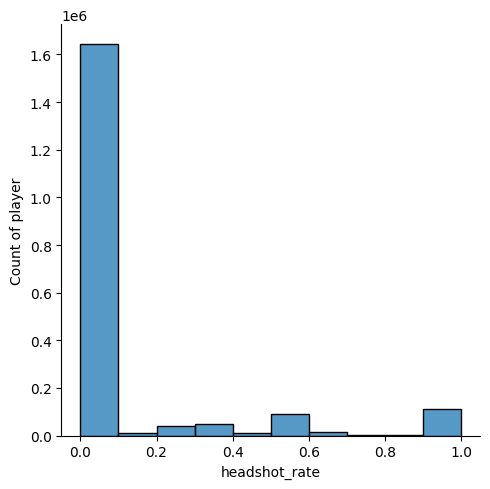

In [124]:
sns.displot(data['headshot_rate'],bins=10)
plt.ylabel("Count of player")
plt.show

# **if the player have rate is 1 and all the kills greater than 5 i.e very impossible case so we need to drop for such a anamoly kills**

In [125]:
data[(data['headshot_rate']==1 )& (data['kills']>5)].shape

(81, 32)

In [126]:
data.drop(data[(data['headshot_rate']==1 )& (data['kills']>5)].index,inplace=True)

In [127]:
data[(data['headshot_rate']==1 )& (data['kills']>5)].shape

(0, 32)

# **Longest Sniper distannce ,So more than 500m is not possible ,so its will be unexceptionaly**

In [128]:
data[data['longestKill']>=500].shape

(756, 32)

In [129]:
data.drop(data[data['longestKill']>=500].index,inplace=True)

Weapon changing ..if frequently changing weapon more tha 15 is kinda of anamoly

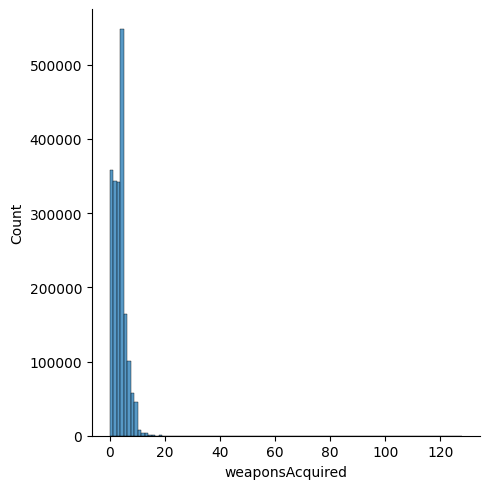

In [130]:
sns.displot(data['weaponsAcquired'],bins=100)
plt.show()

In [131]:
data[data['weaponsAcquired']>=15].shape

(2958, 32)

In [132]:
data.drop(data[data['weaponsAcquired']>=15].index,inplace=True)

In [133]:
data[data['weaponsAcquired']>=15].shape

(0, 32)

In [134]:
data.shape

(1974832, 32)

# **Now the time for correlation to find the dependenct**

In [135]:
data_corr=data.corr()

<ipython-input-135-1242386b175d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr=data.corr()


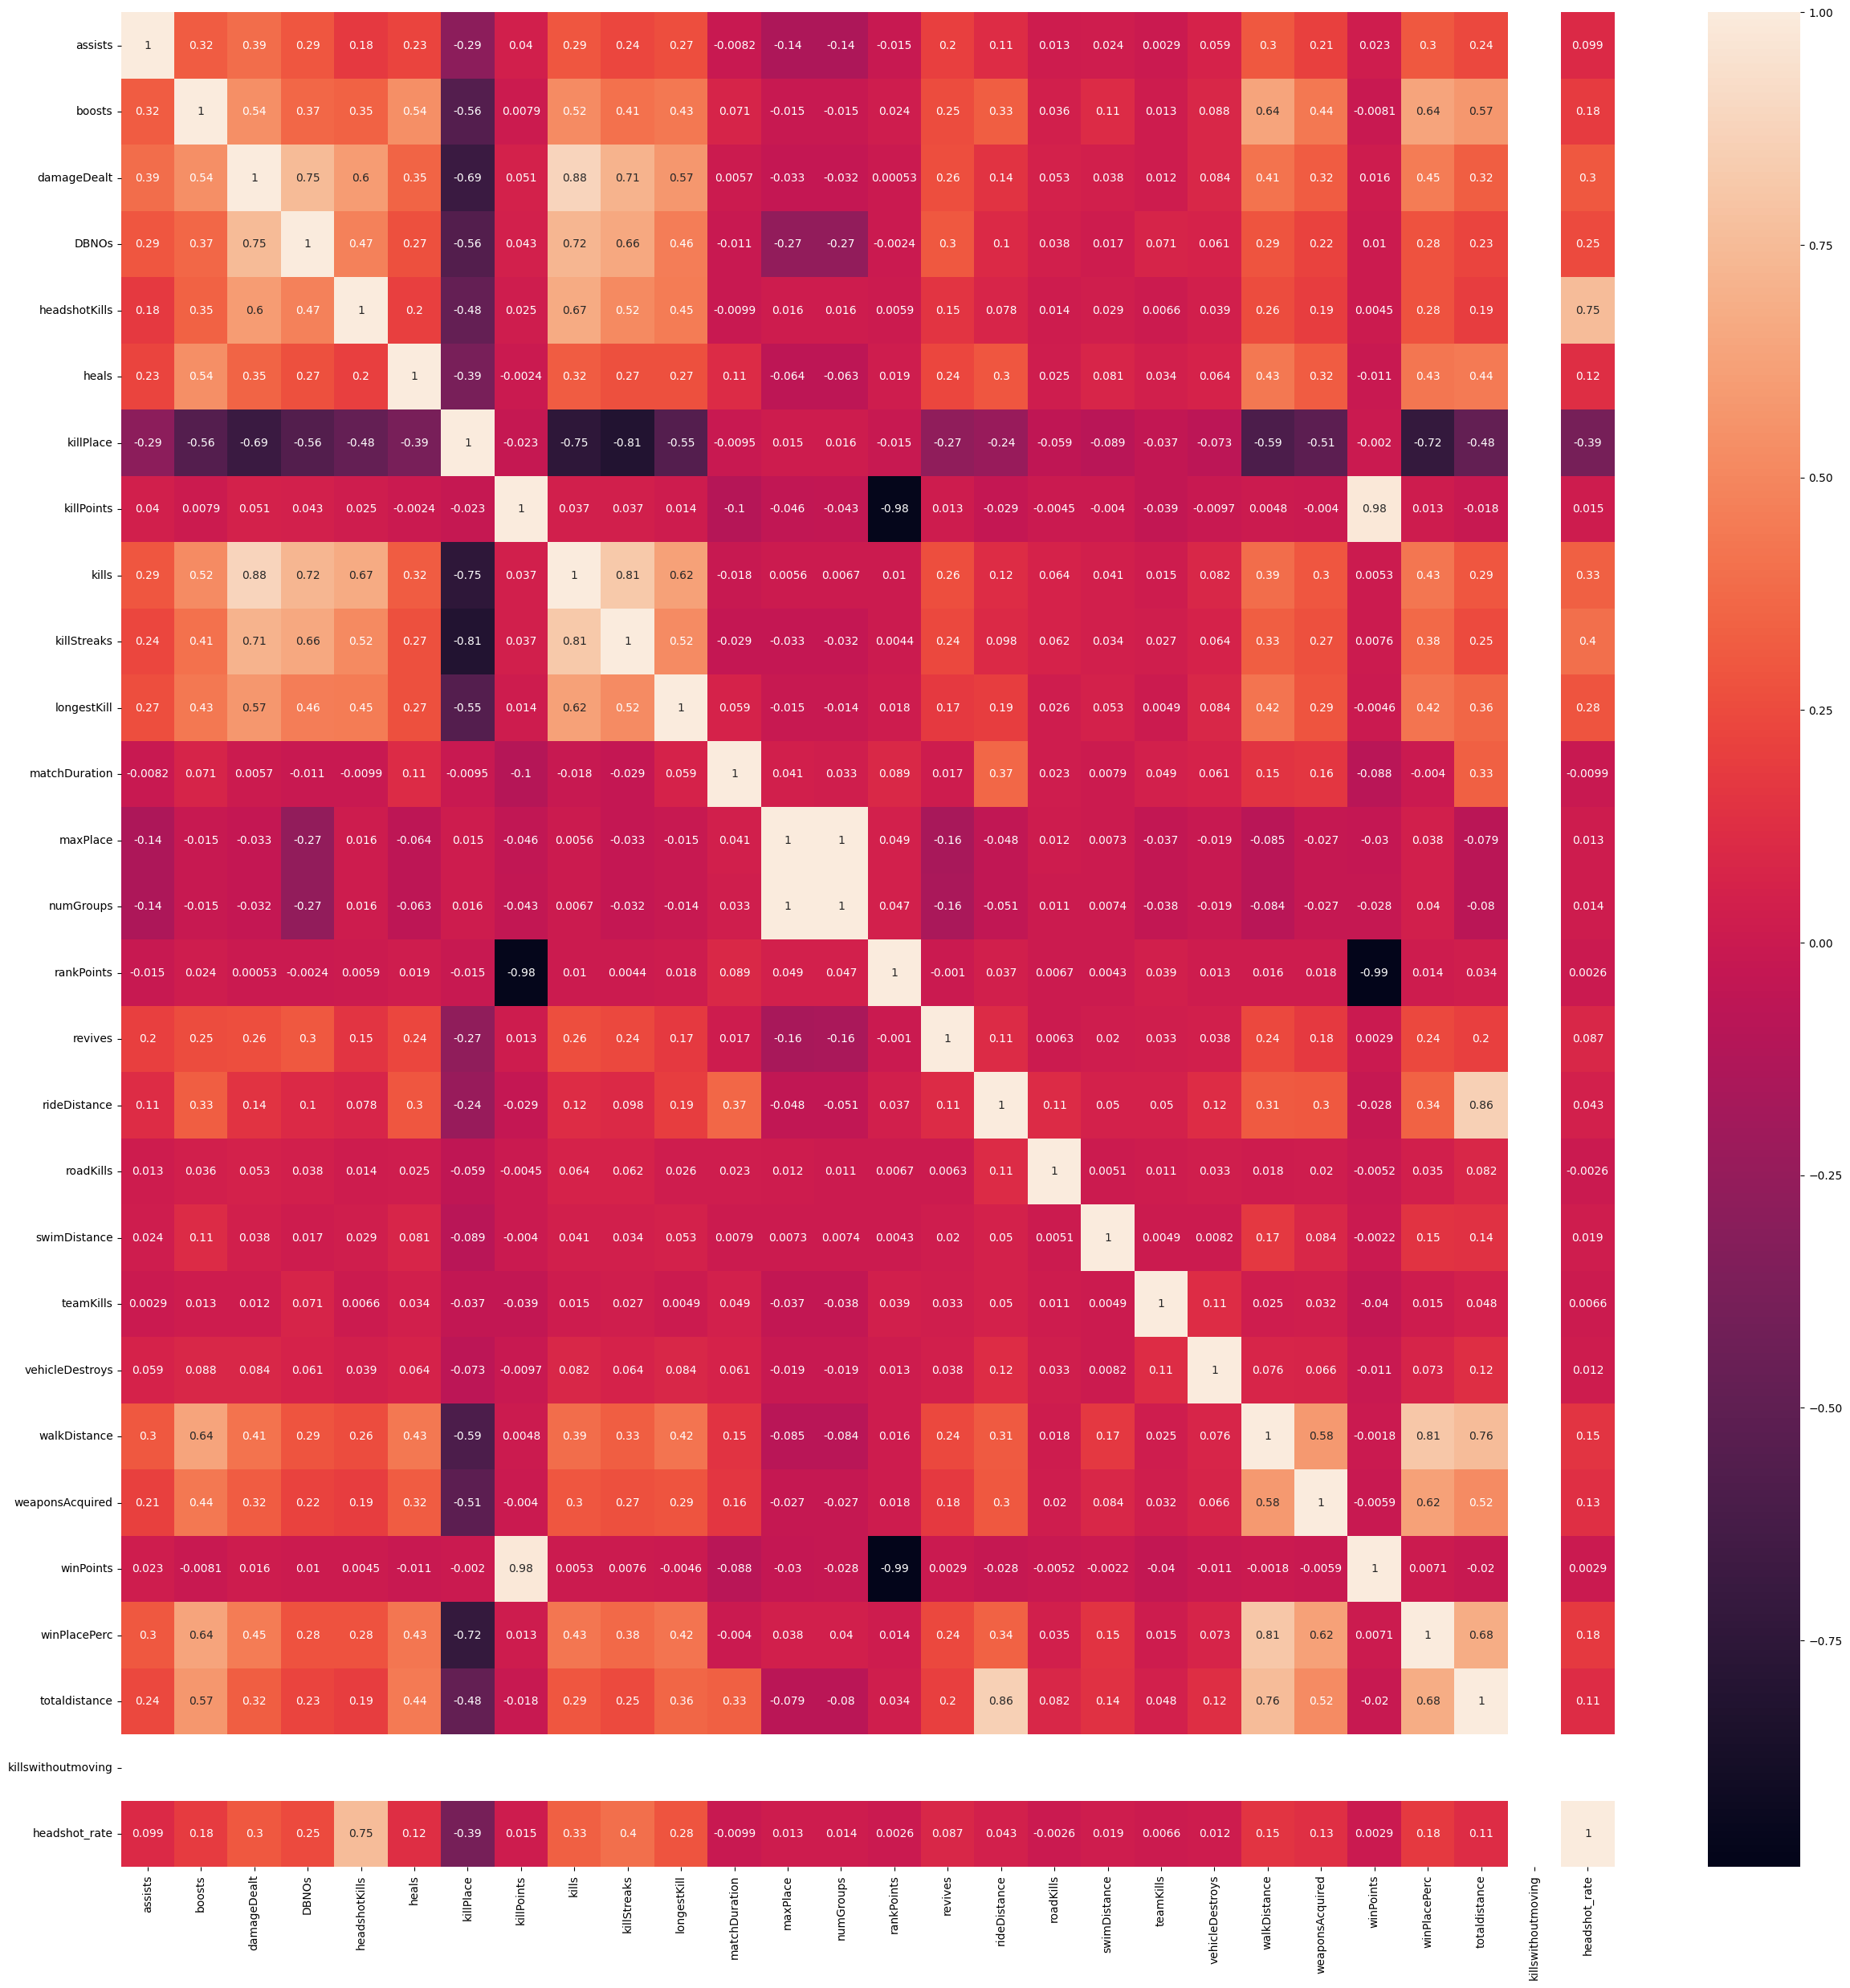

In [136]:
plt.figure(figsize=(30,30))
sns.heatmap(data_corr,annot=True)

plt.show()

# **Feature Engineering:- What the parameter is needed for training**

In [137]:
#suppose  the game joined by 30 people nd player killed 5 kill and other game player 100 nd killling 5 kill so 30 player game will have more weightage.
data["numGroups"]

0          26.0
1          25.0
2          47.0
3          30.0
4          95.0
           ... 
1979554    29.0
1979555    47.0
1979556    26.0
1979557     2.0
1979558     NaN
Name: numGroups, Length: 1974832, dtype: float64

In [138]:
data['matchType']

0          squad-fpp
1          squad-fpp
2                duo
3          squad-fpp
4           solo-fpp
             ...    
1979554    squad-fpp
1979555          duo
1979556    squad-fpp
1979557         solo
1979558          NaN
Name: matchType, Length: 1974832, dtype: object

In [139]:
data['healsboost']= data['heals'] + data['boosts']
data['assists']=data['assists']+ data['revives']


In [140]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'totaldistance',
       'killswithoutmoving', 'headshot_rate', 'healsboost'],
      dtype='object')

In [141]:
data=data.drop(columns=['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance','swimDistance','rideDistance','heals'])

In [142]:
data.shape

(1974832, 24)

# ML-Catboost **Model**

In [143]:
##handling the categorical data

In [198]:
x=data.drop('winPlacePerc',axis=1)


In [199]:
x.shape

(1974832, 23)

In [200]:
y=data['winPlacePerc']

In [151]:
y

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
1979554    0.5357
1979555    0.9787
1979556    0.0800
1979557    0.0000
1979558       NaN
Name: winPlacePerc, Length: 1974832, dtype: float64

In [201]:
data['winPlacePerc']

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
1979554    0.5357
1979555    0.9787
1979556    0.0800
1979557    0.0000
1979558       NaN
Name: winPlacePerc, Length: 1974832, dtype: float64

In [202]:
x.head()

,damageDealt,DBNOs,headshotKills,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,...,revives,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPoints,totaldistance,killswithoutmoving,headshot_rate,healsboost
0,0.00,0.0,0.0,60.0,1241.0,0.0,0.0,0.00,1306.0,squad-fpp,...,0.0,0.0,0.0,0.0,1.0,1466.0,244.8000,False,0.0,0.0
1,91.47,0.0,0.0,57.0,0.0,0.0,0.0,0.00,1777.0,squad-fpp,...,0.0,0.0,0.0,0.0,5.0,0.0,1445.0445,False,0.0,0.0
2,68.00,0.0,0.0,47.0,0.0,0.0,0.0,0.00,1318.0,duo,...,0.0,0.0,0.0,0.0,2.0,0.0,161.8000,False,0.0,0.0
3,32.90,0.0,0.0,75.0,0.0,0.0,0.0,0.00,1436.0,squad-fpp,...,0.0,0.0,0.0,0.0,3.0,0.0,202.7000,False,0.0,0.0
4,100.00,0.0,0.0,45.0,0.0,1.0,1.0,58.53,1424.0,solo-fpp,...,0.0,0.0,0.0,0.0,2.0,0.0,49.7500,False,0.0,0.0


In [203]:
data.head()

,damageDealt,DBNOs,headshotKills,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,...,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPoints,winPlacePerc,totaldistance,killswithoutmoving,headshot_rate,healsboost
0,0.00,0.0,0.0,60.0,1241.0,0.0,0.0,0.00,1306.0,squad-fpp,...,0.0,0.0,0.0,1.0,1466.0,0.4444,244.8000,False,0.0,0.0
1,91.47,0.0,0.0,57.0,0.0,0.0,0.0,0.00,1777.0,squad-fpp,...,0.0,0.0,0.0,5.0,0.0,0.6400,1445.0445,False,0.0,0.0
2,68.00,0.0,0.0,47.0,0.0,0.0,0.0,0.00,1318.0,duo,...,0.0,0.0,0.0,2.0,0.0,0.7755,161.8000,False,0.0,0.0
3,32.90,0.0,0.0,75.0,0.0,0.0,0.0,0.00,1436.0,squad-fpp,...,0.0,0.0,0.0,3.0,0.0,0.1667,202.7000,False,0.0,0.0
4,100.00,0.0,0.0,45.0,0.0,1.0,1.0,58.53,1424.0,solo-fpp,...,0.0,0.0,0.0,2.0,0.0,0.1875,49.7500,False,0.0,0.0


In [204]:
features=x.columns

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974832 entries, 0 to 1979558
Data columns (total 24 columns):
 #   Column              Dtype  
---  ------              -----  
 0   damageDealt         float64
 1   DBNOs               float64
 2   headshotKills       float64
 3   killPlace           float64
 4   killPoints          float64
 5   kills               float64
 6   killStreaks         float64
 7   longestKill         float64
 8   matchDuration       float64
 9   matchType           object 
 10  maxPlace            float64
 11  numGroups           float64
 12  rankPoints          float64
 13  revives             float64
 14  roadKills           float64
 15  teamKills           float64
 16  vehicleDestroys     float64
 17  weaponsAcquired     float64
 18  winPoints           float64
 19  winPlacePerc        float64
 20  totaldistance       float64
 21  killswithoutmoving  bool   
 22  headshot_rate       float64
 23  healsboost          float64
dtypes: bool(1), float64(22),

In [ ]:
#killswithoutmoving is boolean ,and match type is object

In [205]:
x=pd.get_dummies(x,columns=['matchType'])

In [206]:
x=pd.get_dummies(x,columns=['killswithoutmoving'])


In [207]:
x.info()
features=x.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974832 entries, 0 to 1979558
Data columns (total 38 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   damageDealt                 float64
 1   DBNOs                       float64
 2   headshotKills               float64
 3   killPlace                   float64
 4   killPoints                  float64
 5   kills                       float64
 6   killStreaks                 float64
 7   longestKill                 float64
 8   matchDuration               float64
 9   maxPlace                    float64
 10  numGroups                   float64
 11  rankPoints                  float64
 12  revives                     float64
 13  roadKills                   float64
 14  teamKills                   float64
 15  vehicleDestroys             float64
 16  weaponsAcquired             float64
 17  winPoints                   float64
 18  totaldistance               float64
 19  headshot_rate        

In [196]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.781929,-0.582791,-0.384289,0.449610,1.170798,-0.607158,-0.765188,-0.459696,-1.064911,-0.694965,...,-0.033532,-0.005603,-0.013745,-0.008745,-0.054377,-0.206702,-0.370614,-0.40536,1.235895,0.0
1,-0.228943,-0.582791,-0.384289,0.340297,-0.805847,-0.607158,-0.765188,-0.459696,0.763764,-0.778968,...,-0.033532,-0.005603,-0.013745,-0.008745,-0.054377,-0.206702,-0.370614,-0.40536,1.235895,0.0
2,-0.370832,-0.582791,-0.384289,-0.024078,-0.805847,-0.607158,-0.765188,-0.459696,-1.018321,0.229076,...,-0.033532,-0.005603,-0.013745,-0.008745,-0.054377,-0.206702,-0.370614,-0.40536,-0.809130,0.0
3,-0.583031,-0.582791,-0.384289,0.996173,-0.805847,-0.607158,-0.765188,-0.459696,-0.560182,-0.568959,...,-0.033532,-0.005603,-0.013745,-0.008745,-0.054377,-0.206702,-0.370614,-0.40536,1.235895,0.0
4,-0.177374,-0.582791,-0.384289,-0.096953,-0.805847,0.058869,0.647480,0.727778,-0.606772,2.203162,...,-0.033532,-0.005603,-0.013745,-0.008745,-0.054377,-0.206702,2.698227,-0.40536,-0.809130,0.0


In [164]:
data['matchType'].value_counts()

squad-fpp           781358
duo-fpp             443197
squad               278702
solo-fpp            238494
duo                 139169
solo                 80919
normal-squad-fpp      5822
crashfpp              2736
normal-duo-fpp        2218
flaretpp              1099
normal-solo-fpp        373
flarefpp               310
crashtpp               158
normal-squad           151
normal-duo              63
normal-solo             62
Name: matchType, dtype: int64

In [165]:
#scaling the data
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x))

In [166]:
x.head(10)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.781929,-0.582791,-0.384289,0.449610,1.170798,-0.607158,-0.765188,-0.459696,-1.064911,-0.694965,...,-0.033532,-0.005603,-0.013745,-0.008745,-0.054377,-0.206702,-0.370614,-0.405360,1.235895,0.0
1,-0.228943,-0.582791,-0.384289,0.340297,-0.805847,-0.607158,-0.765188,-0.459696,0.763764,-0.778968,...,-0.033532,-0.005603,-0.013745,-0.008745,-0.054377,-0.206702,-0.370614,-0.405360,1.235895,0.0
2,-0.370832,-0.582791,-0.384289,-0.024078,-0.805847,-0.607158,-0.765188,-0.459696,-1.018321,0.229076,...,-0.033532,-0.005603,-0.013745,-0.008745,-0.054377,-0.206702,-0.370614,-0.405360,-0.809130,0.0
3,-0.583031,-0.582791,-0.384289,0.996173,-0.805847,-0.607158,-0.765188,-0.459696,-0.560182,-0.568959,...,-0.033532,-0.005603,-0.013745,-0.008745,-0.054377,-0.206702,-0.370614,-0.405360,1.235895,0.0
4,-0.177374,-0.582791,-0.384289,-0.096953,-0.805847,0.058869,0.647480,0.727778,-0.606772,2.203162,...,-0.033532,-0.005603,-0.013745,-0.008745,-0.054377,-0.206702,2.698227,-0.405360,-0.809130,0.0
5,-0.177374,0.308477,1.337845,-0.133391,-0.805847,0.058869,0.647480,-0.085580,-0.719366,-0.694965,...,-0.033532,-0.005603,-0.013745,-0.008745,-0.054377,-0.206702,-0.370614,-0.405360,1.235895,0.0
6,-0.781929,-0.582791,-0.384289,1.761361,1.204246,-0.607158,-0.765188,-0.459696,-1.026086,-0.694965,...,-0.033532,-0.005603,-0.013745,-0.008745,-0.054377,-0.206702,-0.370614,-0.405360,1.235895,0.0
7,-0.730313,-0.582791,-0.384289,0.012359,0.786937,-0.607158,-0.765188,-0.459696,1.501446,2.161160,...,-0.033532,-0.005603,-0.013745,-0.008745,-0.054377,-0.206702,2.698227,-0.405360,-0.809130,0.0
8,-0.469979,-0.582791,-0.384289,0.595360,-0.805847,-0.607158,-0.765188,-0.459696,-0.797016,-0.694965,...,-0.033532,-0.005603,-0.013745,-0.008745,-0.054377,-0.206702,-0.370614,2.466945,-0.809130,0.0
9,-0.556612,-0.582791,-0.384289,0.959735,-0.805847,-0.607158,-0.765188,-0.459696,1.357792,-0.652963,...,-0.033532,-0.005603,-0.013745,-0.008745,-0.054377,-0.206702,-0.370614,2.466945,-0.809130,0.0


# splitting the data

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [168]:
x.shape

(1974832, 38)

In [169]:
x_test.shape

(592450, 38)

In [170]:
x_train.shape

(1382382, 38)

In [172]:
#catboost Model
train_dataset=cb.Pool(x_train,y_train)
test_dataset=cb.Pool(x_test,y_test)

In [174]:
train_dataset.shape

(1382382, 38)

In [175]:
model=cb.CatBoostRegressor(loss_function='RMSE')

In [176]:
grid={
    'iterations':[100,150],
    'learning_rate':[0.03,0.1],
    'depth':[2,4,6,8]
}

In [177]:
model.grid_search(grid,train_dataset)

0:	learn: 0.5482758	test: 0.5489289	best: 0.5489289 (0)	total: 217ms	remaining: 21.5s
1:	learn: 0.5334279	test: 0.5340782	best: 0.5340782 (1)	total: 348ms	remaining: 17s
2:	learn: 0.5190326	test: 0.5196783	best: 0.5196783 (2)	total: 478ms	remaining: 15.4s
3:	learn: 0.5051183	test: 0.5057586	best: 0.5057586 (3)	total: 601ms	remaining: 14.4s
4:	learn: 0.4916721	test: 0.4923095	best: 0.4923095 (4)	total: 730ms	remaining: 13.9s
5:	learn: 0.4786665	test: 0.4793012	best: 0.4793012 (5)	total: 917ms	remaining: 14.4s
6:	learn: 0.4660983	test: 0.4667274	best: 0.4667274 (6)	total: 1.14s	remaining: 15.1s
7:	learn: 0.4539245	test: 0.4545536	best: 0.4545536 (7)	total: 1.37s	remaining: 15.7s
8:	learn: 0.4421395	test: 0.4427655	best: 0.4427655 (8)	total: 1.6s	remaining: 16.2s
9:	learn: 0.4306929	test: 0.4313164	best: 0.4313164 (9)	total: 1.84s	remaining: 16.5s
10:	learn: 0.4196745	test: 0.4202969	best: 0.4202969 (10)	total: 2.04s	remaining: 16.5s
11:	learn: 0.4089794	test: 0.4095996	best: 0.4095996 (1

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [208]:
features.shape

(38,)

In [209]:
features_import_df=pd.DataFrame()

In [210]:
features_import_df['features']=features

In [ ]:
#finding the importance col for modelling

In [211]:
features_import_df['Importance']=model.feature_importances_


In [212]:
x.head()

,damageDealt,DBNOs,headshotKills,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killswithoutmoving_False
0,0.00,0.0,0.0,60.0,1241.0,0.0,0.0,0.00,1306.0,28.0,...,0,0,0,0,0,0,0,0,1,1
1,91.47,0.0,0.0,57.0,0.0,0.0,0.0,0.00,1777.0,26.0,...,0,0,0,0,0,0,0,0,1,1
2,68.00,0.0,0.0,47.0,0.0,0.0,0.0,0.00,1318.0,50.0,...,0,0,0,0,0,0,0,0,0,1
3,32.90,0.0,0.0,75.0,0.0,0.0,0.0,0.00,1436.0,31.0,...,0,0,0,0,0,0,0,0,1,1
4,100.00,0.0,0.0,45.0,0.0,1.0,1.0,58.53,1424.0,97.0,...,0,0,0,0,0,0,1,0,0,1


In [213]:
features_import_df

,features,Importance
0,damageDealt,0.118297
1,DBNOs,1.079818
2,headshotKills,0.000000
3,killPlace,40.873598
4,killPoints,0.000000
5,kills,7.176965
6,killStreaks,7.842880
7,longestKill,1.535662
8,matchDuration,5.500028
9,maxPlace,1.917213


In [214]:
features_import_df=features_import_df.sort_values(by=['Importance'],ascending=False)

In [215]:
features_import_df

,features,Importance
3,killPlace,40.873598
18,totaldistance,24.389284
6,killStreaks,7.842880
5,kills,7.176965
8,matchDuration,5.500028
10,numGroups,4.246408
20,healsboost,1.932010
9,maxPlace,1.917213
7,longestKill,1.535662
1,DBNOs,1.079818


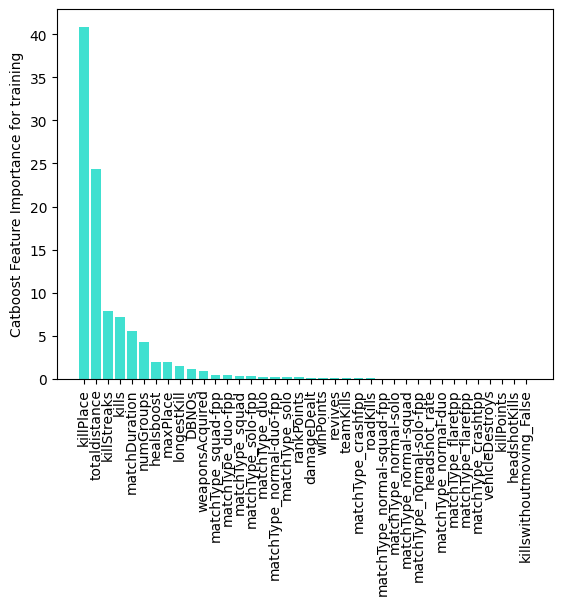

In [216]:
plt.bar(features_import_df.features,features_import_df.Importance,color='turquoise')
plt.ylabel("Catboost Feature Importance for training")
plt.xticks(rotation=90)
plt.show()

Predictions for test case

In [217]:
predict=model.predict(x_test)

In [219]:
y_test.isna().sum()

1

In [223]:
y_test.isna().sum()

0

In [222]:
y_test=y_test.fillna(0)

In [225]:
rmse=np.sqrt(mean_squared_error(y_test,predict))
rmse

0.08559403272275398

In [226]:
r2=r2_score(y_test,predict)


In [230]:
print("Testing Performance")
print("Rmse:",rmse)
print("r2_score:",r2)

Testing Performance
Rmse: 0.08559403272275398
r2_score: 0.9224142705753177
